In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [3]:
data = pd.read_csv("E:\DATA ANALYST\Simple Linear Regression\marketing_sales_data.csv")

In [5]:
data.head(10)

,TV,Radio,Social Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377
5,Low,5.561586,3.530209,Nano,39.992087
6,Medium,13.951808,4.477142,Micro,147.150178
7,Medium,28.352592,4.695376,Mega,229.141912
8,Medium,15.322175,4.379750,Macro,222.696768
9,High,26.914287,6.074165,Mega,322.466797


In [7]:
data.shape

(572, 5)

In [11]:
data.isna().any(axis=0).sum()

0

In [13]:
data.isna().any(axis=1).sum()

0

E:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


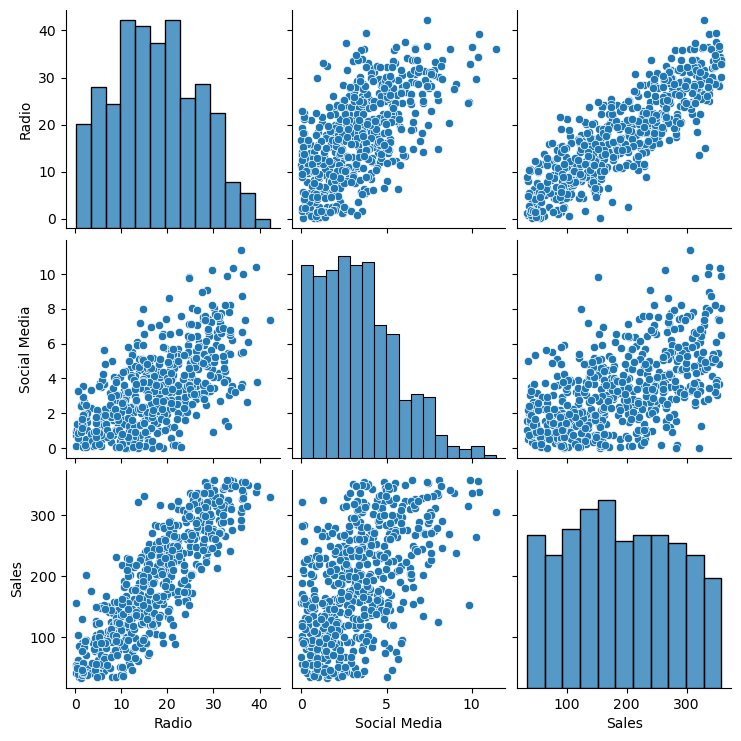

In [15]:
sns.pairplot(data)

### Model building

In [18]:
ols_data = data[["Radio","Sales"]]

In [20]:
ols_data.head(10)

,Radio,Sales
0,3.518070,55.261284
1,7.756876,67.574904
2,20.348988,272.250108
3,20.108487,195.102176
4,31.653200,273.960377
5,5.561586,39.992087
6,13.951808,147.150178
7,28.352592,229.141912
8,15.322175,222.696768
9,26.914287,322.466797


In [22]:
ols_formula = "Sales ~ Radio"

In [24]:
OLS = ols(formula = ols_formula,data=ols_data)

In [26]:
model = OLS.fit()

In [28]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     1591.
Date:                Tue, 15 Jul 2025   Prob (F-statistic):          4.38e-167
Time:                        15:20:38   Log-Likelihood:                -3003.1
No. Observations:                 572   AIC:                             6010.
Df Residuals:                     570   BIC:                             6019.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     43.8789      4.126     10.635      0.000      35.775      51.983
Radio          8.2998      0.208     39.887      0.000       7.891       8.709
==============================================================================
Omnibus:                        0.886   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.642   Jarque-Bera (JB):                0.772
Skew:                           0.086   Prob(JB):                        0.680
Kurtosis:                       3.054   Cond. No.                         42.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='Radio', ylabel='Sales'>

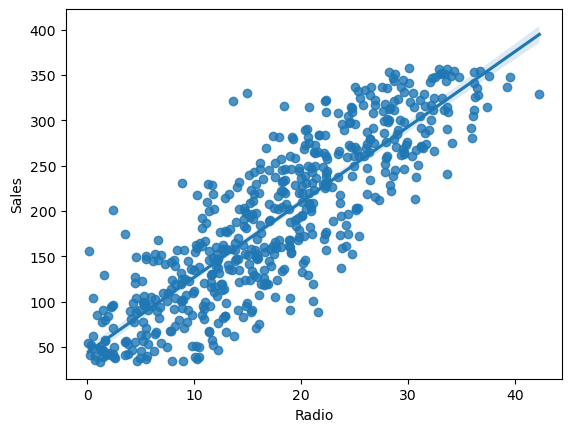

In [30]:
sns.regplot(x="Radio", y = "Sales", data = ols_data)

### Visualize the distribution of the residuals.

In [32]:
residuals = model.resid

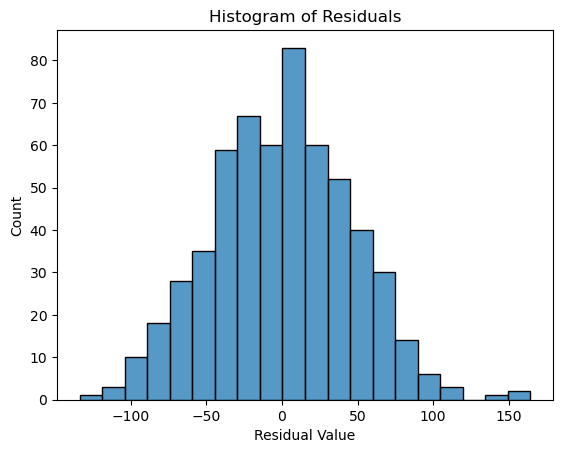

In [34]:
fig = sns.histplot(residuals)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")
plt.show()

### Q-Q plot to confirm the assumption of normality.

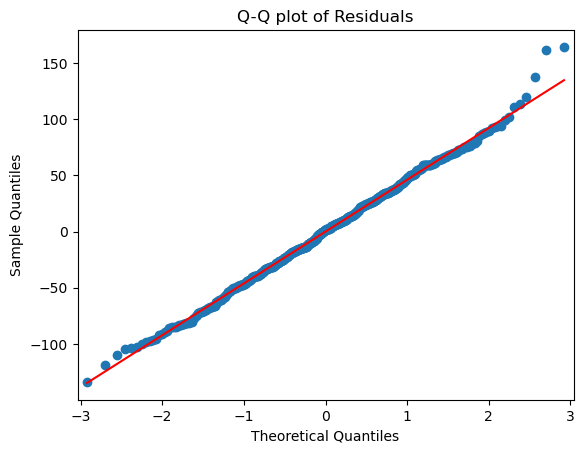

In [36]:
sm.qqplot(residuals, line='s')
plt.title("Q-Q plot of Residuals")
plt.show()

In [38]:
fitted_values = model.predict(ols_data["Radio"])

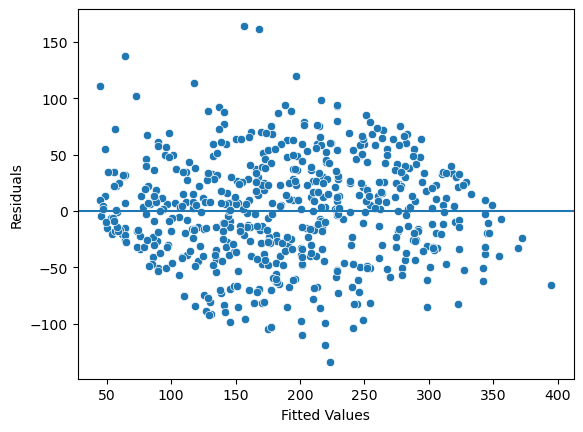

In [40]:
fig = sns.scatterplot(x=fitted_values, y=residuals)
fig.axhline(0)
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
plt.show()